In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pylab as pl
from IPython import display
from IPython.display import clear_output

import time

import seaborn as sns
import numpy as np
from scipy.stats import multivariate_normal as mvn
from sklearn import linear_model
import sklearn.datasets as toy_datasets
import yfinance as yf

### Definitions
$$\rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X \sigma_Y}$$
$$cov(X,Y) = \mathbb{E}[(X-\mu_X)(Y-\mu_Y)]$$
$$\mu_X = \text{Mean of } X$$
$$\mu_X = \text{Mean of } Y$$
$$\sigma_X = \text{Standard deviation of } X$$
$$\sigma_X = \text{Standard deviation of } Y$$

### Estimator
$$ r_{xy} = \frac{\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x}_i)^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y}_i)^2}} $$

In [ ]:
# Example 1
# data = toy_datasets.load_wine()
# print(data['feature_names'])
X, y = toy_datasets.load_wine(return_X_y=True)
xx = X[:,0]   # alcohol content
yy = X[:,12]  # proline
plt.figure()
sns.scatterplot(x=xx, y=yy)
r = np.corrcoef(xx, yy)
plt.title('r=%0.02f' % (r[0,1],))
plt.xlabel('Alcohol')
plt.xlabel('Proline')

In [ ]:
# Example 2
xx = X[:,0]   # alcohol
yy = X[:,4]   # magnesium
plt.figure()
sns.scatterplot(x=xx, y=yy)
r = np.corrcoef(xx, yy)
plt.title('r=%0.02f' % (r[0,1],))
plt.xlabel('Alcohol')
plt.xlabel('Magnesium')

### Bivariate Gaussian Distribution
$$ f(x,y) = \frac{1}{2 \pi \sigma_x \sigma_y \sqrt{1-\rho^2}} \text{exp} \left( -\frac{1}{2(1-\rho^2)} \left[ \left( \frac{x-\mu_x}{\sigma_x} \right)^2 - 2 \rho \left( \frac{x-\mu_x}{\sigma_x} \right) \left( \frac{y-\mu_y}{\sigma_y} \right) +  \left( \frac{y-\mu_y}{\sigma_y} \right)^2 \right] \right) $$

<IPython.core.display.Javascript object>


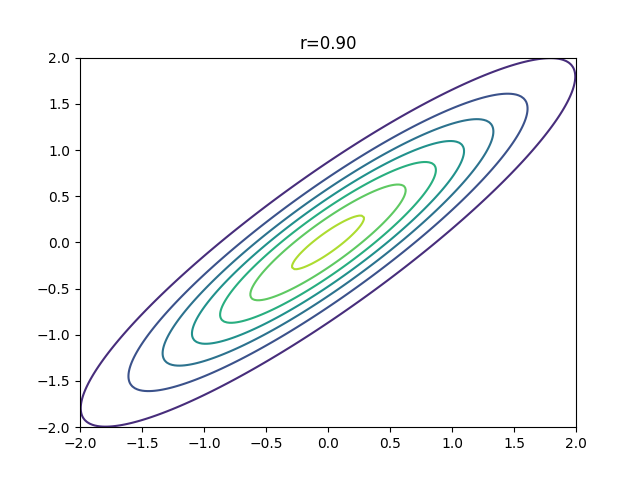

In [6]:
plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111)

for r in np.arange(-0.9,0.9+0.1,0.1):
    R = [[1, r], [r, 1]]
    rv = mvn([0, 0], R)

    N = 200
    K = 2
    X = np.linspace(-K, K, N)
    Y = np.linspace(-K, K, N)
    X, Y = np.meshgrid(X, Y)
    pos = np.dstack((X, Y))
    Z = rv.pdf(pos)
    
    ax.cla()
    ax.contour(X, Y, Z)
    plt.title('r=%0.02f' % (r,))
    
    display.display(plt.gcf())
    display.clear_output(wait=True)
#     time.sleep(0.1)
    plt.pause(0.1)